# Overview
I mainly used the cost function $\ell(y_i \mid x_i, \theta) = y_i \ln(h)) + (1 - y_i)\ln(1-h))$, where $h = \sigma(\theta^\intercal x_i)$ to implement my code. To update the weights of logistic regression, I used gradient descent. I took the derivative of $\ell$ and set it to zero. Then I get $\frac{\partial \theta}{\partial \theta} = X^\intercal(y-h)$. Using $\theta = \theta -lr\times \frac{\partial \theta}{\partial w}$ to update $\theta$. After 1000 iterations, my model is converged and I achived the optimal $\theta$. Then I applied the weights on valid data to calculated the error rates.

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# reading data
X = pd.read_csv("IRISFeat.csv", header = None).values
y = pd.read_csv("IRISlabel.csv", header = None).values
y = y.reshape([-1,1])

# insert X0, a vector with all 1s, to the first column of feature matrix X
X0 = np.ones((X.shape[0], 1))
X = np.concatenate((X0, X), axis = 1)


In [236]:
# initializing parameters
# lr - learning rate
# num_iter - Max number of epochs
# eps - a tiny number added to sigma(z) to avoid the log(0) error
lr = 0.2
num_iter = 1000
eps = 1e-10

In [237]:
def cross_validation(X, y):
    X_shuffled = {}
    y_shuffled = {}
    num = len(y)
    index = np.arange(num)
    np.random.shuffle(index)
    for i in range(5):
        X_shuffled[i] = X[index[i*num//5:(i+1)*num//5],:]
        y_shuffled[i] = y[index[i*num//5:(i+1)*num//5],:]
    return X_shuffled, y_shuffled

In [238]:
# After taking a fold as valid set, merge the rest folds to one matrix as training set 
def merge_dict(itr, mydict):
    a = np.ones((1,mydict[itr].shape[1]))
    for i in range(5):
        if i != itr:
            a = np.concatenate((a, mydict[i]), axis=0)
    a = np.delete(a, 0, axis=0)
    return a

In [239]:
# logistic function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [240]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    X_valid = X_shuffled[itr]
    y_valid = y_shuffled[itr]
    X_train = merge_dict(itr, X_shuffled)
    y_train = merge_dict(itr, y_shuffled)
    return X_train, y_train, X_valid, y_valid

In [241]:
def predict(Xvalid,theta):
    z = np.dot(Xvalid, theta)
    y_predict_class = sigmoid(z)
    return y_predict_class

In [242]:
def cost_function(X_train, y_train, theta):
    m = len(y)
    y_predict = predict(X_train, theta)
    cost = -np.dot(y_train.T, np.log(y_predict+eps))-np.dot((1-y_train.T), np.log(1-y_predict+eps))
    cost = cost/m
    return cost

In [243]:
# label those features with prob>=0.5 as class 1, and prob<0.5 as class 0
def decision_boundary(a):
    for i in range(len(a)):
        if a[i]>=0.5:
            a[i]=1
        else:
            a[i]=0


In [244]:
# implementation of gradient descent to update weights(theta) and return cost of each epoch
def train(X_train, y_train):
    costs = []
    theta = np.random.random((3,1))
    m = len(y_train)
    for i in range(num_iter):
        y_predict = predict(X_train,theta)
        d_theta = np.dot(X_train.T, y_predict-y_train)
        d_theta = d_theta/m
        
        # update theta using GD
        theta = theta - lr * d_theta
        cost = cost_function(X_train, y_train, theta)
        costs.append(np.asscalar(cost))
    return theta, costs

In [245]:
def error_rate(y_predict, y):
    diff = y_predict-y
    return np.count_nonzero(diff)/len(diff)

In [246]:
def main():
    X_shuffled, y_shuffled = cross_validation(X, y)
    train_error=[]
    valid_error=[]
    for itr in range(5):
        X_train, y_train, X_valid, y_valid = get_next_train_valid(X_shuffled, y_shuffled, itr)
        optimal_theta,costs = train(X_train, y_train)
        
        # print train error rates
        y_train_predict = predict(X_train, optimal_theta)
        decision_boundary(y_train_predict)
        error1 = error_rate(y_train_predict, y_train)
        print("itr = %d, training error rate is %f" % (itr,error1))
        train_error.append(error1)
        # print valid error rates
        y_valid_predict = predict(X_valid, optimal_theta)
        decision_boundary(y_valid_predict)
        error2 = error_rate(y_valid_predict, y_valid)
        print("itr = %d, valid error rate is %f" % (itr,error2))
        valid_error.append(error2)
        
    print("The average training error rate is: %f" % (np.mean(train_error)))
    print("The average valid error rate is: %f" % (np.mean(valid_error)))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Convergence of Cost Function with lr = 0.2")
    plt.plot(costs)
    plt.show()

itr = 0, training error rate is 0.008333
itr = 0, valid error rate is 0.000000
itr = 1, training error rate is 0.008333
itr = 1, valid error rate is 0.000000
itr = 2, training error rate is 0.000000
itr = 2, valid error rate is 0.033333
itr = 3, training error rate is 0.008333
itr = 3, valid error rate is 0.000000
itr = 4, training error rate is 0.008333
itr = 4, valid error rate is 0.000000
The average training error rate is: 0.006667
The average valid error rate is: 0.006667


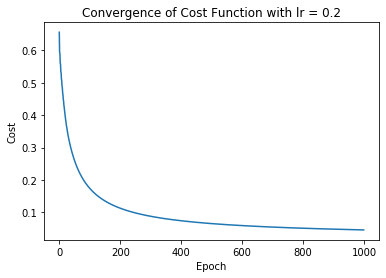

In [247]:
main()

# Summary
## How I chose my learning rate
The learning rate is usually determined randomly by the user. However, there is still some philosphy to choose a proper learning rate. Here I simply use my formal experience on traing neural networks, with setting learning rate around 0.1. I set lr=0.01, 0.05, 0.1, 0.2 and compared the convergence curves. In my perspective, when lr = 0.2, the cost function converges rapidly and could gain the minimal.
## Effects of learning rate
In fact, I prefer to consider learning rate as a step each epoch jumps to find a local minima. If the step is large, which means you choose a large learning rate, then you might always overshoot the minima, and it is hard for cost function to converge. What's worse, if your lr is very large, the cost function may even diverge.
However, if you choosed a small lr, the cost function will converge too slowly, which means you may waste a lot of time on training.